# **TASK :** 

To perform Regression in order to predict the percentage of marks that a student is expercted to score based upon the number of hours they studied.

# **DETAILS :** 

Perform Linear regression which involves two dependent variables.

# **PROBLEM:** 

What wil be the predicted score if the student studies for 9.25 hours a day?


# **What is Linear Regression?**

1.  Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). 

2.  If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points

3.  The equation of the above line is : Y= mx + b


*Load the dataset*

In [52]:
import csv
import urllib3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# %matplotlib inline

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


*Obtain Statistical details of the dataset*


In [54]:
df.shape

(25, 2)

In [55]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [56]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [57]:
df.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


*Perfrom Data Visualizations*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ce61bdf60>,
      dtype=object)

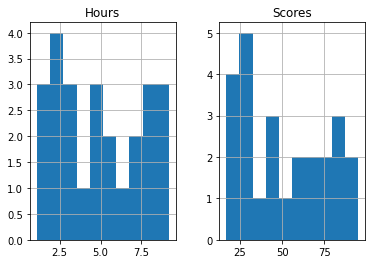

In [25]:
# A histogram to get the representation of the distribution of data
pd.DataFrame.hist(df)

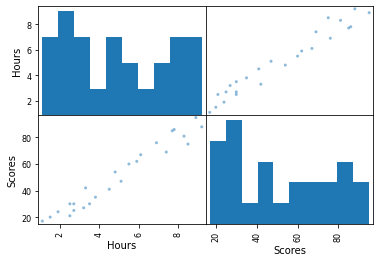

In [34]:
# A scatter matrix (pairs plot) compactly plots all the numeric variables we have in a dataset against each other
# we are thus able to produce a relatively complex matrix of scatterplots and histograms
pd.plotting.scatter_matrix(df)
plt.show()

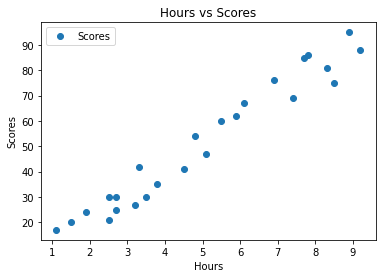

In [58]:
# Plotting our data points on a 2-D graph to  see if we can manually find any relationship between the data 
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

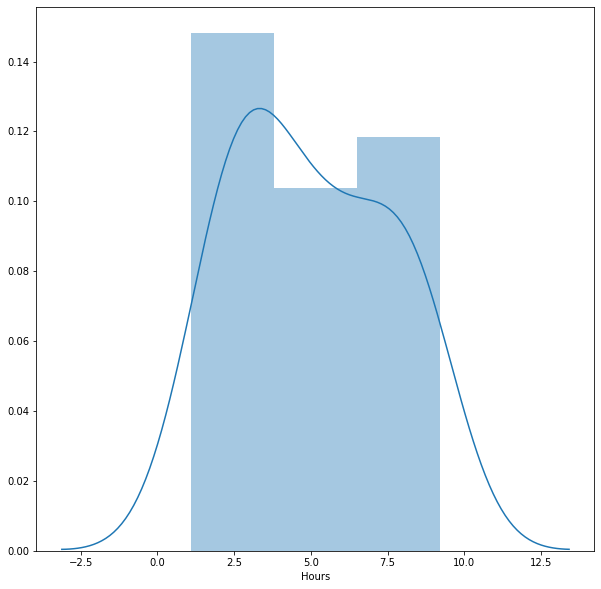

In [59]:
# Checking the average max hours studied which is between 2.5 and 5 hours
plt.figure(figsize=(10,10))
plt.tight_layout()
seabornInstance.distplot(df['Hours'])

*Dividing the data into “attributes” and “labels”.
Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset, we only have two columns. We want to predict the Scores depending upon the Hours a student studied. Therefore our attribute set will consist of the “Hours” column which is stored in the X variable, and the label will be the “Scores” column which is stored in y variable.*

In [60]:
X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)

*Splitting 80% of the data to the training set while 20% of the data to test set.*

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

*Import LinearRegression class, instantiate it, and call the fit() method along with our training data.*

In [62]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

*Linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data.*

In [63]:
#To retrieve the intercept:
print(regressor.intercept_)

[2.01816004]


In [64]:
#For retrieving the slope:
print(regressor.coef_)

[[9.91065648]]


*Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score.*

In [65]:
y_pred = regressor.predict(X_test)

Text(0, 0.5, 'Percentage score')

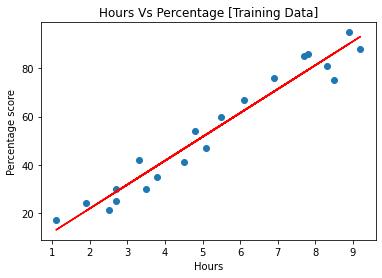

In [71]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),color = 'red')
plt.title("Hours Vs Percentage [Training Data]")
plt.xlabel("Hours")
plt.ylabel("Percentage score")

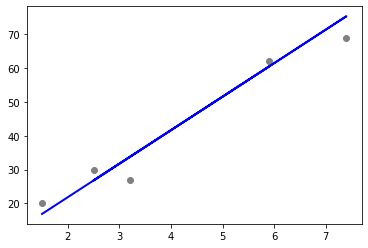

In [48]:
plt.scatter(X_test, y_test,  color='gray')
plt.title("Hours Vs Percentage [Testing Data]")
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

*Compare the actual output values for X_test with the predicted values*

In [66]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


*Predicting Scores if a student studies for 9.25 hours a day
If student studies for 9.25 hours a day the predicted score is 93.69 percentage.*

In [75]:
hours = 9.25
pred = regressor.predict([[hours]])
print(pred)

[[93.69173249]]


*Evaluation of the model.*

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
